In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
coimbra = pd.read_csv('Coimbra_breast_cancer.csv')
coimbra

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,54,35.207389,103,5.642,1.378660,65.6699,9.738408,31.17499,197.660,1
1,52,22.978520,132,6.054,1.145435,47.5445,3.627241,23.03327,423.361,2
2,32,21.101341,87,5.668,1.008595,50.5074,5.067841,9.51156,897.034,2
3,42,26.761205,132,2.875,1.003837,16.8972,10.096475,9.75652,267.744,1
4,55,34.232520,76,3.120,1.597721,17.6852,11.845054,17.21541,788.552,2
...,...,...,...,...,...,...,...,...,...,...
3995,83,24.222881,76,10.511,0.733816,17.9836,5.423659,8.66752,324.763,2
3996,84,21.504832,137,4.567,1.314829,28.1327,5.878012,10.31806,380.140,2
3997,66,29.198300,137,6.823,0.688278,8.7539,10.242825,10.32697,634.979,2
3998,73,22.871102,90,10.564,3.623631,26.8907,14.407806,6.88789,621.063,2


In [3]:
coimbra.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             4000 non-null   int64  
 1   BMI             4000 non-null   float64
 2   Glucose         4000 non-null   int64  
 3   Insulin         4000 non-null   float64
 4   HOMA            4000 non-null   float64
 5   Leptin          4000 non-null   float64
 6   Adiponectin     4000 non-null   float64
 7   Resistin        4000 non-null   float64
 8   MCP.1           4000 non-null   float64
 9   Classification  4000 non-null   int64  
dtypes: float64(7), int64(3)
memory usage: 312.6 KB


In [15]:
coimbra = coimbra.drop(['Age', 'Insulin', 'HOMA', 'Leptin', 'Adiponectin', 'Resistin', 'MCP.1', 'Classification'], axis = 1)
coimbra

,BMI,Glucose
0,35.207389,103
1,22.978520,132
2,21.101341,87
3,26.761205,132
4,34.232520,76
...,...,...
3995,24.222881,76
3996,21.504832,137
3997,29.198300,137
3998,22.871102,90


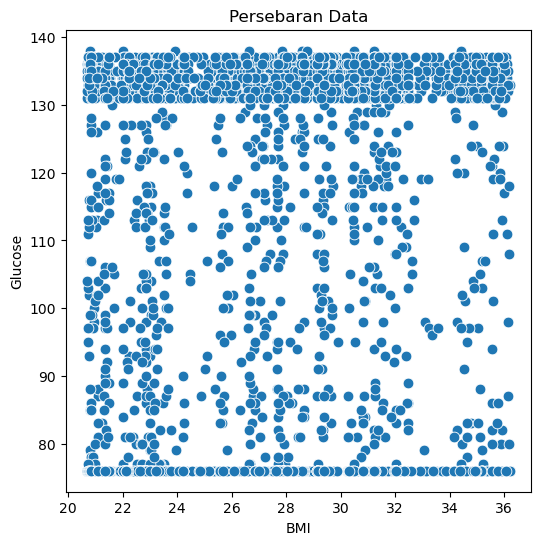

In [16]:
# persebaran data 
plt.figure(figsize=(6,6))
sns.scatterplot(x = 'BMI', y = 'Glucose', data = coimbra, s = 60)
plt.title('Persebaran Data')
plt.show()

In [17]:
# hitung within cluster sum of squared error (wcss) untuk tiap kluster yang berbeda
from sklearn.cluster import KMeans

wcss = []
for i in range (1,11): 
    kmModel = KMeans(n_clusters = i, n_init = 10)
    kmModel.fit(coimbra)
    wcss.append(kmModel.inertia_)

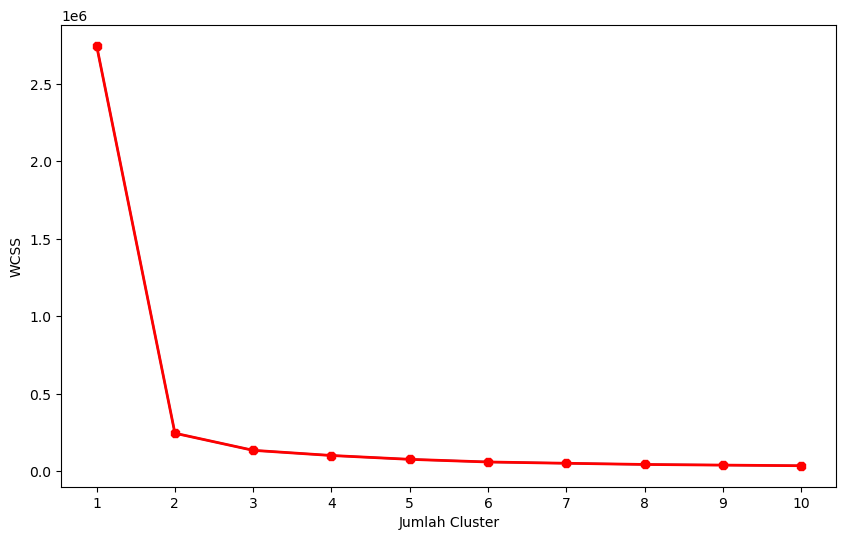

In [18]:
plt.figure(figsize = (10,6))
plt.plot(range(1,11), wcss)
plt.plot(range(1,11), wcss, linewidth = 2, color = 'red', marker = '8')
plt.xlabel("Jumlah Cluster")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

In [19]:
# model dengan 5 cluster

kmModelFix = KMeans(n_clusters = 5, n_init = 10) # n_init = 10 / n_init = 'auto'
kmModelFix.fit(coimbra)

# memprediksi hasil
hasil_prediksi = kmModelFix.predict(coimbra)
hasil_prediksi

array([3, 0, 3, ..., 2, 3, 1])

In [20]:
coimbra['Label'] = hasil_prediksi
coimbra.head()

,BMI,Glucose,Label
0,35.207389,103,3
1,22.978520,132,0
2,21.101341,87,3
3,26.761205,132,0
4,34.232520,76,1


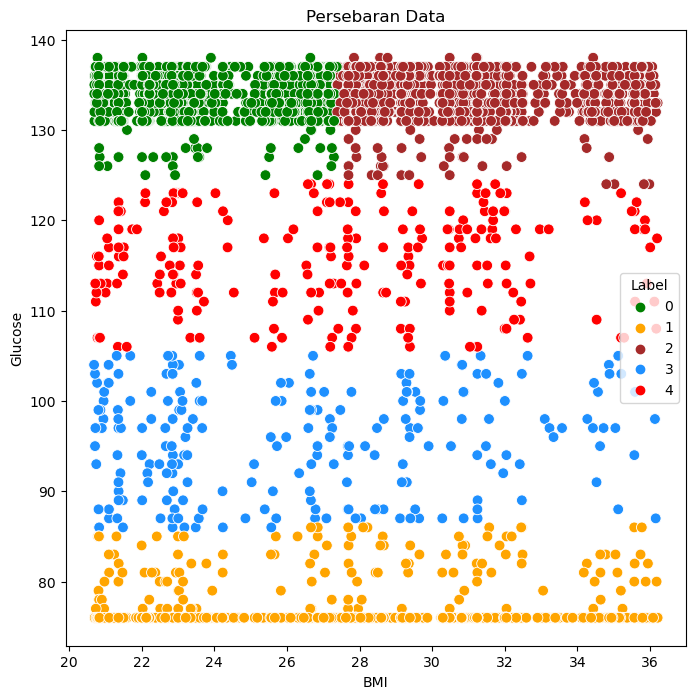

In [21]:
# persebaran data beserta labelnya 

plt.figure(figsize = (8,8))
sns.scatterplot(x = 'BMI', y = 'Glucose', hue = 'Label', 
palette = ['green','orange', 'brown', 'dodgerblue', 'red'], legend = 'full', data = coimbra,
s = 60) 
plt.title('Persebaran Data')
plt.show()